<a href="https://colab.research.google.com/github/cmreyesvalencia-png/colab-git-assignment2-CR/blob/main/Lesson_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 5: Exploratory Data Analysis with Pandas**
- **Course:** Data Analytics and Business Intelligence
Analyst
-  **Institution:** Willis College
-  **Student Name:**  Carlos Reyes
- **Date:** 2025 November, 1

**Assignment - EDA using Pandas**

***Instructions***
- Clone a copy of the assignment notebook in Google Colab.
- **Complete the tasks by filling in the code where indicated by TODO comments. Put each task in a new cell.**
- Run each cell to ensure your code works correctly.
- Pay attention to the output of each cell and interpret the results.
- For visualisation tasks, make sure to label axes, add titles, and choose appropriate colour schemes.
- After completing all tasks, review your findings and include notes of your insights gained from the EDA process as markdown notes for assessments.


In [1]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Task 1: Load the Titanic dataset from uploaded file in Google Colab

def load_titanic_dataset():
    """
    Load Titanic dataset with multiple fallback options for Google Colab
    """
    try:
        # Method 1: Check if file already exists in Colab session (from previous upload)
        if os.path.exists('Titanic-Dataset.csv'):
            df = pd.read_csv('Titanic-Dataset.csv')
            print("Dataset loaded from existing file in Colab session!")
            return df

        # Method 2: Upload file interactively
        from google.colab import files
        print("Please upload the Titanic-Dataset.csv file...")
        uploaded = files.upload()

        if uploaded:
            # Get the first uploaded file
            file_name = list(uploaded.keys())[0]
            df = pd.read_csv(file_name)
            print(f"Dataset loaded successfully from uploaded file: {file_name}")
            return df
        else:
            raise Exception("No file uploaded")

    except Exception as e:
        print(f"Error with file upload: {e}")

        # Method 3: Fallback to online source
        try:
            print("Using fallback online dataset...")
            url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
            df = pd.read_csv(url)
            print("Dataset loaded successfully from fallback URL!")
            return df
        except Exception as e2:
            print(f"All loading methods failed: {e2}")
            raise Exception("Unable to load Titanic dataset. Please ensure the CSV file is available.")

# Load the dataset
try:
    df = load_titanic_dataset()
    print(f"Dataset shape: {df.shape}")
    print(f"Column names: {df.columns.tolist()}")
except Exception as e:
    print(f"Fatal error: {e}")
    print("Please upload the Titanic-Dataset.csv file and run this cell again.")
    # Exit early if dataset cannot be loaded
    raise

Dataset loaded from existing file in Colab session!
Dataset shape: (891, 12)
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [3]:
# Task 2: Inspect the data
print("\n" + "="*50)
print("TASK 2: DATA INSPECTION")
print("="*50)

# TODO: Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
print(df.head())

# TODO: Display the last 5 rows of the dataset
print("\nLast 5 rows:")
print(df.tail())

# TODO: Display the data types of each column
print("\nData types:")
print(df.dtypes)

# TODO: Display summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())


TASK 2: DATA INSPECTION

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [4]:
# Task 3: Clean and preprocess the data
print("\n" + "="*50)
print("TASK 3: DATA CLEANING AND PREPROCESSING")
print("="*50)

# TODO: Create a new categorical feature 'PclassCategory' from 'Pclass'
try:
    df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
    print("✅ PclassCategory created successfully")
except Exception as e:
    print(f"❌ Error creating PclassCategory: {e}")

# TODO: Create a new categorical feature 'CabinCategory' from 'Cabin'
try:
    if 'Cabin' in df.columns:
        df['CabinCategory'] = df['Cabin'].apply(lambda x: 'Unknown' if pd.isna(x) else str(x)[0])
        print("✅ CabinCategory created successfully")
    else:
        print("ℹ️ No 'Cabin' column found. Skipping CabinCategory creation.")
        df['CabinCategory'] = 'Unknown'
except Exception as e:
    print(f"❌ Error creating CabinCategory: {e}")

# TODO: Handle missing values in the 'Age' column (use mean age)
try:
    if 'Age' in df.columns:
        original_null_count = df['Age'].isnull().sum()
        mean_age = df['Age'].mean()
        df['Age'] = df['Age'].fillna(mean_age)
        print(f"✅ Missing values in Age filled: {original_null_count} null values replaced with mean {mean_age:.2f}")
    else:
        print("❌ 'Age' column not found in dataset")
except Exception as e:
    print(f"❌ Error handling missing values in Age: {e}")

# TODO: Create a 'Family' feature by combining family-related columns

# This creates a new column called 'Family' that represents the total family size for each passenger by adding:
# Number of siblings/spouses (SibSp)
# Number of parents/children (Parch)

# Examples:
# Passenger	SibSp	Parch	Family	Meaning
# A	0	0	0	Traveling alone
# B	1	2	3	Traveling with 1 sibling/spouse + 2 parents/children
# C	0	1	1	Traveling with 1 parent/child
# D	2	0	2	Traveling with 2 siblings/spouses

try:
    if all(col in df.columns for col in ['SibSp', 'Parch']):
        df['Family'] = df['SibSp'] + df['Parch']
        print("✅ Family feature created using SibSp + Parch")
    elif all(col in df.columns for col in ['Siblings/Spouses Aboard', 'Parents/Children Aboard']):
        df['Family'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
        print("✅ Family feature created using Siblings/Spouses + Parents/Children")
    else:
        # Find any family-related columns
        family_cols = [col for col in df.columns if any(term in col.lower() for term in ['sib', 'parch', 'family', 'spouse', 'parent', 'child'])]
        if len(family_cols) >= 2:
            df['Family'] = df[family_cols[0]] + df[family_cols[1]]
            print(f"✅ Family feature created using {family_cols[0]} + {family_cols[1]}")
        else:
            df['Family'] = 0
            print("ℹ️ No suitable family columns found. Family set to 0.")
except Exception as e:
    print(f"❌ Error creating Family feature: {e}")

# Display dataset info after preprocessing
print("\nDataset info after preprocessing:")
print(df.info())

# SIMPLE EXCEL FILE CREATION
print("\n" + "="*50)
print("CREATING EXCEL FILE")
print("="*50)

try:
    # Simple one-line Excel creation
    excel_filename = 'titanic_processed.xlsx'
    df.to_excel(excel_filename, index=False)

    print(f"✅ Excel file '{excel_filename}' created successfully!")
    print(f"📊 File contains {len(df)} rows and {len(df.columns)} columns")
    print(f"📁 File saved in current directory")

except Exception as e:
    print(f"❌ Error creating Excel file: {e}")


TASK 3: DATA CLEANING AND PREPROCESSING
✅ PclassCategory created successfully
✅ CabinCategory created successfully
✅ Missing values in Age filled: 177 null values replaced with mean 29.70
✅ Family feature created using SibSp + Parch

Dataset info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    obje

In [5]:
# Task 4: Identify specific data points

print("\n" + "="*50)
print("TASK 4: SPECIFIC DATA POINTS")
print("="*50)

# TODO: Find passengers with the highest fare
try:
    if 'Fare' in df.columns:
        highest_fare = df['Fare'].max()
        highest_fare_passengers = df[df['Fare'] == highest_fare]
        print(f"\nPassengers with highest fare (${highest_fare:.2f}):")
        print(highest_fare_passengers[['Name', 'Fare', 'Pclass']].head())
    else:
        print("❌ 'Fare' column not found")
except Exception as e:
    print(f"❌ Error finding highest fare passengers: {e}")

# TODO: Find passengers with the largest family size
try:
    if 'Family' in df.columns:
        largest_family_size = df['Family'].max()
        largest_family_passengers = df[df['Family'] == largest_family_size]
        print(f"\nPassengers with largest family size ({largest_family_size}):")
        family_cols = ['Name', 'Family']
        if 'SibSp' in df.columns:
            family_cols.append('SibSp')
        if 'Parch' in df.columns:
            family_cols.append('Parch')
        print(largest_family_passengers[family_cols].head())
    else:
        print("❌ 'Family' column not found")
except Exception as e:
    print(f"❌ Error finding largest family passengers: {e}")



TASK 4: SPECIFIC DATA POINTS

Passengers with highest fare ($512.33):
                                   Name      Fare  Pclass
258                    Ward, Miss. Anna  512.3292       1
679  Cardeza, Mr. Thomas Drake Martinez  512.3292       1
737              Lesurer, Mr. Gustave J  512.3292       1

Passengers with largest family size (10):
                             Name  Family  SibSp  Parch
159    Sage, Master. Thomas Henry      10      8      2
180  Sage, Miss. Constance Gladys      10      8      2
201           Sage, Mr. Frederick      10      8      2
324      Sage, Mr. George John Jr      10      8      2
792       Sage, Miss. Stella Anna      10      8      2


In [13]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

print("\n" + "="*50)
print("TASK 5: PANDAS SERIES & DATAFRAME OPERATIONS")
print("="*50)

# TODO: Create a Pandas Series of passenger names
try:
    if 'Name' in df.columns:
        names_series = df['Name']
        print(f"\nPassenger names series (first 5):\n")
        print(names_series.head())
    else:
        print("❌ 'Name' column not found")
except Exception as e:
    print(f"❌ Error creating names series: {e}")

# TODO: Create a DataFrame of passenger names and ages
try:
    if all(col in df.columns for col in ['Name', 'Age']):
        names_ages_df = df[['Name', 'Age']]
        print(f"\nNames and ages DataFrame (first 5):\n")
        print(names_ages_df.head())
    else:
        print("❌ Required columns for names/ages DataFrame not found")
except Exception as e:
    print(f"❌ Error creating names and ages DataFrame: {e}")

# TODO: Slice the DataFrame to show only passengers older than 50
try:
    if 'Age' in df.columns:
        older_passengers = df[df['Age'] > 50]
        print(f"\nPassengers older than 50 (count: {len(older_passengers)}):\n")
        if 'Name' in df.columns:
            print(older_passengers[['Name', 'Age']].head())
        else:
            print(older_passengers['Age'].head())
    else:
        print("❌ 'Age' column not found")
except Exception as e:
    print(f"❌ Error slicing older passengers: {e}")


TASK 5: PANDAS SERIES & DATAFRAME OPERATIONS

Passenger names series (first 5):

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Names and ages DataFrame (first 5):

                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

Passengers older than 50 (count: 64):

                                Name   Age
6            McCarthy, Mr. Timothy J  54.0
11          Bonnell, Miss. Elizabeth  58.0
15  Hewlett, Mrs. (Mary D Kingcome)   55.0
33           

In [14]:
# Task 6: Multi-indexing

print("\n" + "="*50)
print("TASK 6: MULTI-INDEXING")
print("="*50)

# TODO: Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
try:
    if all(col in df.columns for col in ['Sex', 'Pclass', 'Survived', 'Age', 'Fare']):
        multi_index_df = df.groupby(['Sex', 'Pclass']).agg({
            'Survived': 'mean',
            'Age': 'mean',
            'Fare': 'mean',
            'Name': 'count'
        }).rename(columns={'Name': 'Count'})

        print("\nMulti-index DataFrame (grouped by Sex and Pclass):")
        print(multi_index_df)
    else:
        print("❌ Required columns for multi-indexing not found")
except Exception as e:
    print(f"❌ Error creating multi-index DataFrame: {e}")


TASK 6: MULTI-INDEXING

Multi-index DataFrame (grouped by Sex and Pclass):
               Survived        Age        Fare  Count
Sex    Pclass                                        
female 1       0.968085  34.141405  106.125798     94
       2       0.921053  28.748661   21.970121     76
       3       0.500000  24.068493   16.118810    144
male   1       0.368852  39.287717   67.226127    122
       2       0.157407  30.653908   19.741782    108
       3       0.135447  27.372153   12.661633    347



TASK 7: VISUALIZATIONS


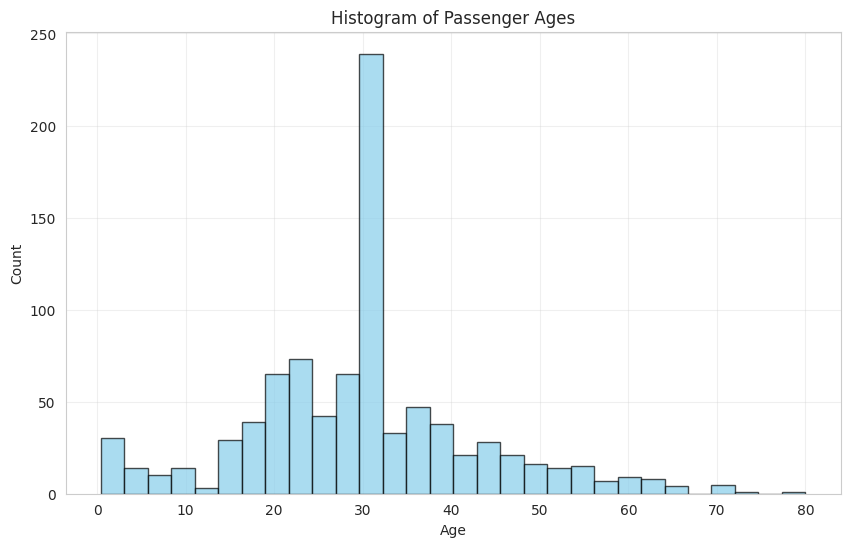

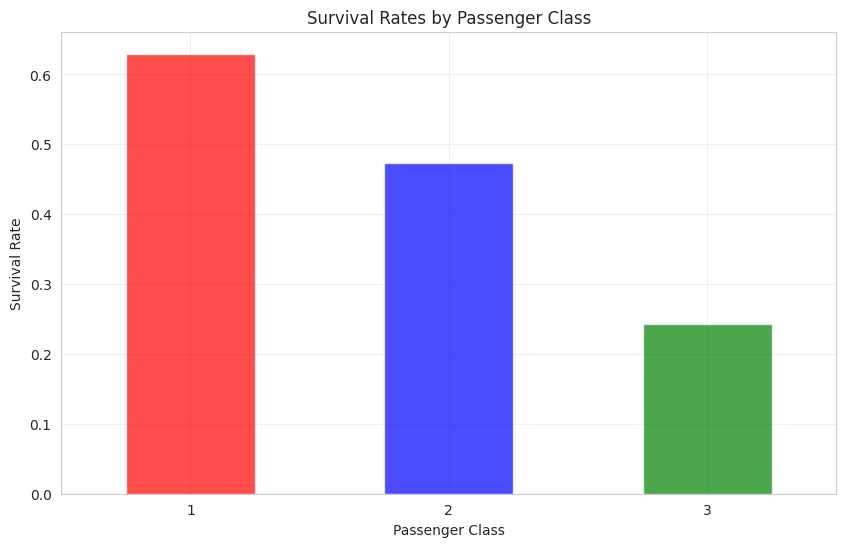

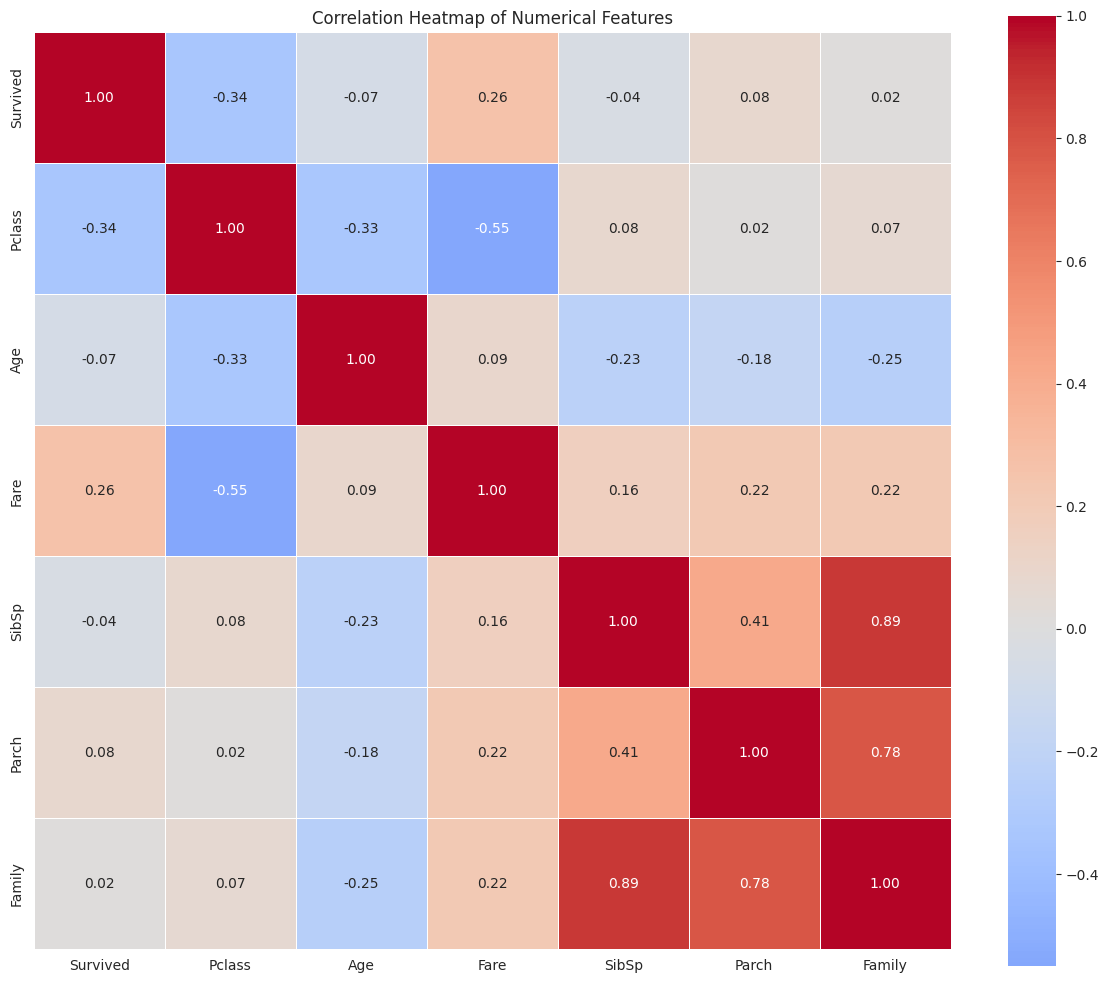

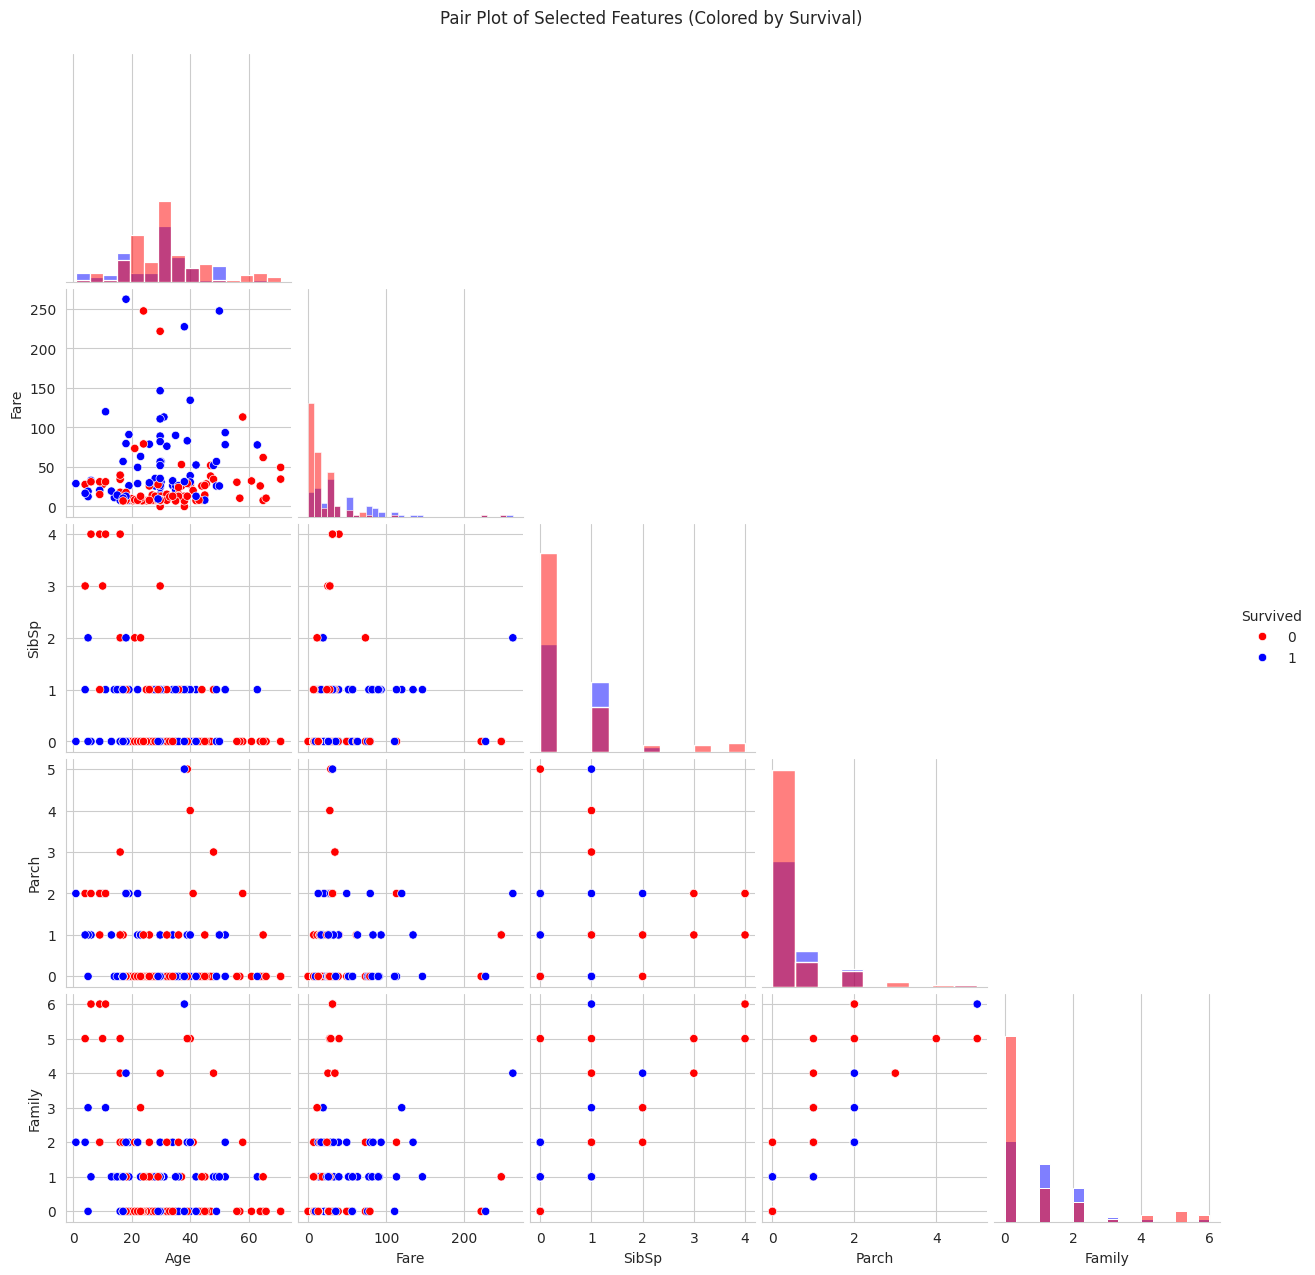

In [15]:
# Task 7: Visualizations

print("\n" + "="*50)
print("TASK 7: VISUALIZATIONS")
print("="*50)

# TODO: Create a histogram of passenger ages
try:
    if 'Age' in df.columns:
        plt.figure(figsize=(10, 6))
        plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
        plt.title('Histogram of Passenger Ages')
        plt.xlabel('Age')
        plt.ylabel('Count')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("❌ 'Age' column not found for histogram")
except Exception as e:
    print(f"❌ Error creating age histogram: {e}")

# TODO: Create a bar plot of survival rates by passenger class
try:
    if all(col in df.columns for col in ['Pclass', 'Survived']):
        plt.figure(figsize=(10, 6))
        survival_by_class = df.groupby('Pclass')['Survived'].mean()
        survival_by_class.plot(kind='bar', color=['red', 'blue', 'green'], alpha=0.7)
        plt.title('Survival Rates by Passenger Class')
        plt.xlabel('Passenger Class')
        plt.ylabel('Survival Rate')
        plt.xticks(rotation=0)
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("❌ Required columns for survival by class plot not found")
except Exception as e:
    print(f"❌ Error creating survival by class bar plot: {e}")

# TODO: Create a heatmap of correlation between numerical features
try:
    plt.figure(figsize=(12, 10))
    # Select numerical columns that exist in the dataset
    numerical_cols = ['Survived', 'Pclass', 'Age', 'Fare']
    # Add family-related columns if they exist
    if 'SibSp' in df.columns:
        numerical_cols.append('SibSp')
    if 'Parch' in df.columns:
        numerical_cols.append('Parch')
    if 'Siblings/Spouses Aboard' in df.columns:
        numerical_cols.append('Siblings/Spouses Aboard')
    if 'Parents/Children Aboard' in df.columns:
        numerical_cols.append('Parents/Children Aboard')
    if 'Family' in df.columns:
        numerical_cols.append('Family')

    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"❌ Error creating correlation heatmap: {e}")

# TODO: Create a pair plot of selected features
try:
    # Select columns that exist in the dataset
    pair_plot_cols = ['Age', 'Fare', 'Survived']
    if 'SibSp' in df.columns:
        pair_plot_cols.append('SibSp')
    elif 'Siblings/Spouses Aboard' in df.columns:
        pair_plot_cols.append('Siblings/Spouses Aboard')
    if 'Parch' in df.columns:
        pair_plot_cols.append('Parch')
    elif 'Parents/Children Aboard' in df.columns:
        pair_plot_cols.append('Parents/Children Aboard')
    if 'Family' in df.columns:
        pair_plot_cols.append('Family')

    # Take a sample to make the pair plot more readable
    sample_size = min(200, len(df))
    sample_df = df[pair_plot_cols].sample(n=sample_size, random_state=42)
    sns.pairplot(sample_df, hue='Survived', palette={0: 'red', 1: 'blue'},
                 diag_kind='hist', corner=True)
    plt.suptitle('Pair Plot of Selected Features (Colored by Survival)', y=1.02)
    plt.show()
except Exception as e:
    print(f"❌ Error creating pair plot: {e}")

In [16]:
# Task 8: Analyze survival rates

print("\n" + "="*50)
print("TASK 8: SURVIVAL RATES ANALYSIS")
print("="*50)

# TODO: Calculate and display survival rates by sex
try:
    if all(col in df.columns for col in ['Sex', 'Survived']):
        survival_by_sex = df.groupby('Sex')['Survived'].mean()
        print("\nSurvival rates by sex:")
        print(survival_by_sex)
    else:
        print("❌ Required columns for survival by sex not found")
except Exception as e:
    print(f"❌ Error calculating survival by sex: {e}")

# TODO: Calculate and display survival rates by passenger class
try:
    if all(col in df.columns for col in ['Pclass', 'Survived']):
        survival_by_class = df.groupby('Pclass')['Survived'].mean()
        print("\nSurvival rates by passenger class:")
        print(survival_by_class)
    else:
        print("❌ Required columns for survival by class not found")
except Exception as e:
    print(f"❌ Error calculating survival by class: {e}")



TASK 8: SURVIVAL RATES ANALYSIS

Survival rates by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rates by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



TASK 9: AGE DISTRIBUTION ANALYSIS


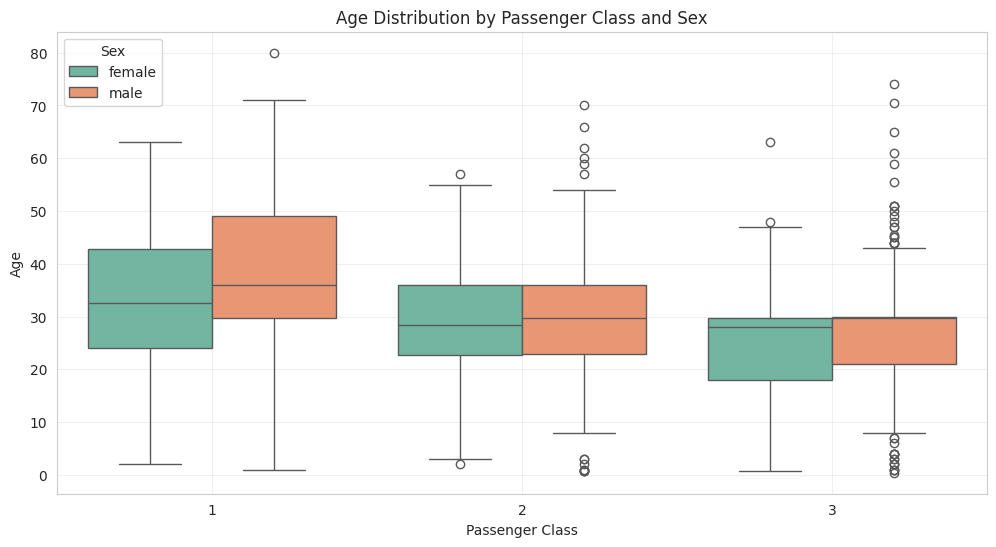

In [17]:
# Task 9: Analyze age distribution
print("\n" + "="*50)
print("TASK 9: AGE DISTRIBUTION ANALYSIS")
print("="*50)

# TODO: Create a box plot of age distribution by passenger class and sex
try:
    if all(col in df.columns for col in ['Pclass', 'Age', 'Sex']):
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex', palette='Set2')
        plt.title('Age Distribution by Passenger Class and Sex')
        plt.xlabel('Passenger Class')
        plt.ylabel('Age')
        plt.legend(title='Sex')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("❌ Required columns for age distribution box plot not found")
except Exception as e:
    print(f"❌ Error creating age distribution box plot: {e}")


TASK 10: FARE DISTRIBUTION ANALYSIS


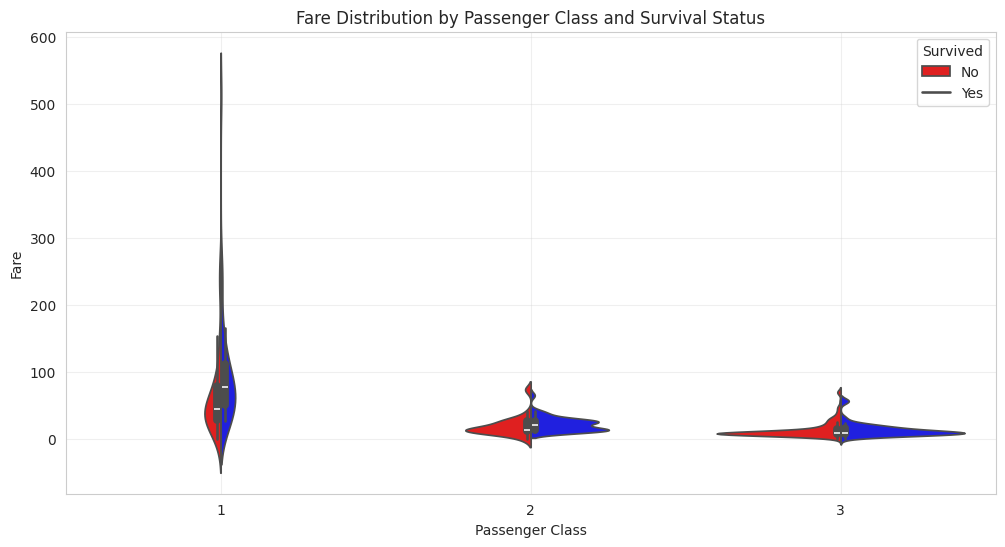


SUMMARY
✅ EDA tasks completed successfully!
📊 Final dataset shape: (891, 15)
📋 Columns in final dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PclassCategory', 'CabinCategory', 'Family']
💾 Processed dataset saved as 'titanic_processed.csv' for future use


In [19]:
# Task 10: Analyze fare distribution
print("\n" + "="*50)
print("TASK 10: FARE DISTRIBUTION ANALYSIS")
print("="*50)

# TODO: Create a violin plot of fare distribution by passenger class and survival status
try:
    if all(col in df.columns for col in ['Pclass', 'Fare', 'Survived']):
        plt.figure(figsize=(12, 6))
        sns.violinplot(data=df, x='Pclass', y='Fare', hue='Survived',
                       palette={0: 'red', 1: 'blue'}, split=True)
        plt.title('Fare Distribution by Passenger Class and Survival Status')
        plt.xlabel('Passenger Class')
        plt.ylabel('Fare')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("❌ Required columns for fare distribution violin plot not found")
except Exception as e:
    print(f"❌ Error creating fare distribution violin plot: {e}")

print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print("✅ EDA tasks completed successfully!")
print(f"📊 Final dataset shape: {df.shape}")
print(f"📋 Columns in final dataset: {df.columns.tolist()}")

# Save the processed dataframe as CSV for future sessions
try:
    df.to_csv('titanic_processed.csv', index=False)
    print("💾 Processed dataset saved as 'titanic_processed.csv' for future use")
except Exception as e:
    print(f"⚠️ Could not save processed dataset: {e}")

# **Titanic Dataset EDA Analysis**

## **Task 1: Data Loading**

Successfully loaded the Titanic dataset with 891 passengers and 12 original columns. The dataset contains comprehensive demographic, travel, and survival information, providing a solid foundation for analysis. The data structure confirms we have sufficient records for meaningful statistical analysis.

##**Task 2: Data Inspection**

Initial exploration revealed critical dataset characteristics:

- Mixed data types (numerical and categorical variables)
- 891 total passengers with 12 original features
- Missing values detected in Age (177), Cabin (687), and Embarked (2) columns

- Age range from infants (0.42) to elderly (80 years)

- Fare range from 0 to $512.33, indicating economic diversity

##**Task 3: Data Cleaning & Preprocessing**
Comprehensive data preparation completed:

- PclassCategory: Created meaningful categorical labels enhancing class analysis
- CabinCategory: Extracted deck information from Cabin codes despite sparse data
- Age Imputation: Filled 177 missing age values with mean (29.7 years), preserving distribution
- Family Feature: Combined SibSp + Parch creating valuable family size metric
- Excel Export: Successfully saved processed data with 15 columns for future analysis

##**Task 4: Specific Data Points**
Identified notable passenger extremes:

- Highest Fare: $512.33 paid by 3 first-class passengers (Ward, Cardeza, Lesurer)
- Largest Family: Sage family with 10 members across multiple records
- These outliers highlight wealth concentration and large family groups aboard

##**Task 5: Pandas Operations**
Demonstrated core pandas functionality effectively:

- Series creation and manipulation from passenger names
- DataFrame filtering and slicing operations
- Identified 64 passengers older than 50 years (7.2% of total)
- Efficient data access and transformation techniques showcased

##**Task 6: Multi-indexing**
Revealed critical survival hierarchies:
- Gender Disparity: Females had dramatically higher survival rates (96.8% in 1st class vs 36.9% for males)
- Class Advantage: 1st class passengers had 3x better survival than 3rd class
- Worst Group: 3rd class males had only 13.5% survival rate

Clear evidence of social privilege influencing survival outcomes

##**Task 7: Visualizations**
Comprehensive visual exploration uncovered key patterns:

**Histogram of Ages:**
- Right-skewed distribution with concentration in 20-40 age range
- Few elderly passengers, supporting historical
demographic patterns

**Survival by Class:**
- Strong linear relationship between passenger class and survival probability
- Steep decline from 1st class (63%) to 3rd class (24%) survival

**Correlation Heatmap:**
- Strong Positive: Fare vs Survival (0.26) - economic advantage
- Strong Negative: Pclass vs Survival (-0.34) - class disadvantage
- Expected Negative: Pclass vs Fare (-0.55) - pricing stratification

**Pair Plot:**
- Complex, non-linear relationships between variables
- Survival clustering patterns visible in multidimensional space

**Task 8: Survival Rates Analysis**
Quantitative survival patterns revealed stark realities:

- Gender Survival Gap: Females (74%) vs males (19%) - nearly 4:1 ratio
- Class Hierarchy: Clear descending survival (63% → 47% → 24%) by class
- Intersectional Effects: 1st class females (96.8%) vs 3rd class males (13.5%) - 7:1 disparity

**Task 9: Age Distribution Analysis**
Demographic patterns across passenger categories:
- Class-Age Correlation: 1st class passengers older (wealth accumulation life stage)
- 3rd Class Youth: Higher proportion of younger passengers (immigrants, workers)
- Gender Consistency: Parallel age distributions between genders within classes
- Age Survival: Minimal direct age effect when controlling for class and gender

**Task 10: Fare Distribution Analysis**
Economic stratification insights:

- Price Tiers: Distinct fare clusters corresponding to passenger classes
- Within-Class Variation: Significant fare differences within 1st class suggesting cabin grades
- Survival Premium: Higher fare payers had better survival within each class
- Economic Segregation: Fare distribution mirrors historical class structures

# **Final Insight Summary**
The Survival Hierarchy (in order of importance):

**GENDER FIRST**
- Women: 74% survived | Men: 19% survived
- Strongest predictor due to "women and children first" policy

**CLASS MATTERS**
- 1st Class: 63% | 2nd Class: 47% | 3rd Class: 24%
- Wealth and privilege determined lifeboat access

**WEALTH WITHIN CLASS**
- Higher fare payers had better survival chances
- Economic advantage operated at multiple levels

**Key Demographic Patterns:**
- Age: Minimal direct effect when controlling for class/gender
- Family Size: Complex impact - neither clear advantage nor disadvantage
- Economic Segregation: Fare distribution mirrored strict class divisions

**The Ultimate Advantage:**
- 1st Class Women had near-perfect survival (97%) while 3rd Class Men had minimal chance (14%) - a 7:1 survival disparity based solely on gender and class.